# Exploratory Data Analysis (EDA)

### Import Libraries

In [593]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [594]:
basicdata = pd.read_csv('Data/gtzan-musicspeech-collection/datalables.txt')

In [595]:
basicdata.head()

,Filename,Music
0,acomic2.wav,0
1,acomic.wav,0
2,allison.wav,0
3,amal.wav,0
4,austria.wav,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7368444898>]],
      dtype=object)

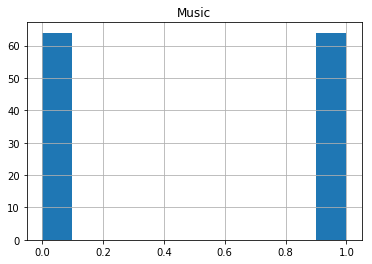

In [596]:
basicdata.hist(column='Music')

In [597]:
CorpusPath = 'Data/gtzan-musicspeech-collection/Corpus/'
Corpusfiles = listdir(CorpusPath)
fn =len(Corpusfiles)

In [598]:
import random
selected = random.choice(Corpusfiles)

### Take a look at its Spectrogram

In [599]:
import librosa
import librosa.display
import IPython.display as ipd

In [600]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
print('Playing the file: '+selected)
ipd.Audio(CorpusPath+selected) 

Playing the file: ipanema.wav


In [601]:
from scipy.fftpack import fft
from scipy.io import wavfile 
import numpy as np
from scipy.signal import blackman
fs, data = wavfile.read(CorpusPath+selected)
w = blackman(len(data))
c = fft(data*w)
d = len(c)/2  
xf = np.linspace(0.0, 1.0/(2.0*(1/Fs)), len(data)//2)
Mag = abs(c[:int(d)])

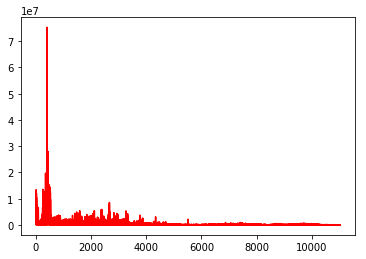

In [602]:
plt.plot(xf, Mag,'r') 
plt.show()

In [603]:
components = [np.sum(part) for part in  np.split(Mag, 3)]
norm = [i/sum(components) for i in components]

In [604]:
norm

[0.8052625493272108, 0.11741633891339393, 0.0773211117593952]